# Homework 4

**Before you start:** Read Chapter 6 Linear Regression and Chapter 7 K-Nearst-Neighbors in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are welcomed.

# Submitted By:
    Group 17:
    Shreya Pande
    Siddharth Banyal

## Part 1: Linear Regression

### Problem 1 ##

In this problem, you are expected to build a model to predict the Boston housing price.


In [1]:
# # Please remove # and run the following code if you have an error while importing the dataset
!pip install --upgrade openpyxl

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [3]:
# Importing other required libraries
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
print(sklearn.datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\Shreya Pande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [5]:
#Load boston housing dataset
boston_housing = datasets.load_boston()
X = pd.DataFrame(boston_housing['data'], columns = boston_housing['feature_names'])

#"target" is the response variable 
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['target']

In [6]:
data = X
data['target'] = y

In [7]:
data.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Note:** You do not need to standardize data for this question. 


**TODO 1**

Prevent collinearity by removing linearly dependent variables. 

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

In [8]:
df = data.copy()

In [9]:
corr_matrix = df.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Sorting index to drop any columns of the 2 where the coefficient is larger than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the highly correlated features
df = df.drop(to_drop, axis=1)
df

C:\Users\Shreya Pande\AppData\Local\Temp\ipykernel_19048\2032803599.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,22.0


We can see that the column 'TAX' is dropped, but let's visualise our results to get an idea of the colleniarity between the variables

Text(0.5, 1.0, 'Correlation plot between variables')

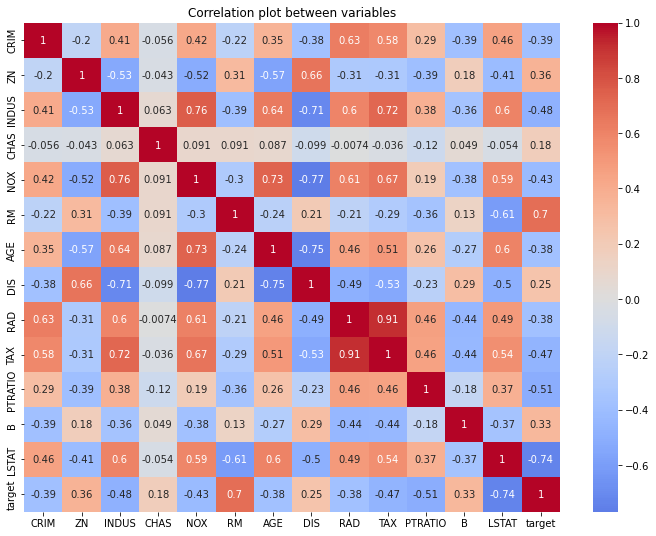

In [10]:
#Visualizing our results by using heatmaps

corr_matrix = data.corr()
plt.figure(figsize=(12, 9))

# Creating the correlation plot using a heatmap as a visual referance to check correlation
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)

# Setting the title of the plot
plt.title('Correlation plot between variables')

We can see from the above heatmap that TAX & RAD have a corellatio of 0.91, hence, in the above code TAX column was dropped


**TODO 2**

Partition the data into 75% training and 25% validation set.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df1=df.iloc[:,:-1]
df2=df[['target']]

In [13]:
# as we have 'X' and 'y' already defined above, we can have the split directly as follows:
X_train, X_val, y_train, y_val = train_test_split(df1, df2, test_size=0.25, random_state=42)

In [14]:
#print('sizes of the partitioned data:\t',X_train.shape, X_val.shape, y_train.shape, y_val.shape)

In [15]:
# Validating the split:

print(f"Training data % split: {round(len(X_train)/len(df)*100)}%")
print(f"Validation data % split: {round(len(X_val)/len(df)*100)}%")

Training data % split: 75%
Validation data % split: 25%



**TODO 3**

If we fit a linear regression model on the training set, what will be the feature weights? 

Calculate the feature weights using the matrix form (do not use any built-in packages such as sklearn or stat models).

In [16]:
# add the column of b0 with 1s to train dataframe
X_train['b0'] = 1
# rearrange the columns in a way that the column of 1s will be in the first position
X_train = X_train[[ 'b0','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
# get the columns name of dataframe
X_train.columns

Index(['b0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
# convert the dataframe to numpy array
xnp = X_train.to_numpy()

In [18]:
# calculate the feature weights with the use of matrix multiplication
beta_hat = np.linalg.inv(xnp.T.dot(xnp)).dot(xnp.T).dot(y_train)

In [19]:
# printing the calculated Beta values or Feature Weights for the variables
fwv = pd.DataFrame({'Predictor': X_train.columns,'Feature Weights Values':beta_hat.flatten()})
fwv

,Predictor,Feature Weights Values
0,b0,28.259949
1,CRIM,-0.127924
2,ZN,0.019811
3,INDUS,-0.011380
4,CHAS,3.008054
5,NOX,-17.328678
6,RM,4.451349
7,AGE,-0.008677
8,DIS,-1.382094
9,RAD,0.117091



**TODO 4**

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice. 

Present the model summary. We call this model **Model 1**.

In [20]:
train_x = X_train[['AGE', 'RM']]
valid_x = X_val[['AGE', 'RM']]

In [21]:
# Linear Regression initiation
model1 = LinearRegression()
model1.fit(train_x, y_train)

LinearRegression()

In [22]:
model1_coef = model1.coef_.flatten()

In [23]:
# Print the summary of the Model 1
print("Summary for Model 1: \n")
# intercept
print('Intercept: ', model1.intercept_, "\n")
# r-squared value of the model
print('R-Squared value: ', model1.score(train_x, y_train), "\n")
# feature weights of the model
print(pd.DataFrame({'Predictors': train_x.columns, 'Feature Weights Values': model1_coef}),"\n")

Summary for Model 1: 

Intercept:  [-27.58753582] 

R-Squared value:  0.5423032349278578 

  Predictors  Feature Weights Values
0        AGE               -0.067594
1         RM                8.724504 




**TODO 5**

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance matrics.

In [24]:
# predict the values based on the fitted training model
y_test_predict = model1.predict(valid_x)
# convert the array to 1D array
y_test_predict = y_test_predict.flatten()
#y_test_predict

In [25]:
#y_val

In [26]:
d = y_val['target'] - y_test_predict

result = pd.DataFrame({'Predicted y': y_test_predict, "Actual y":y_val['target'], "Residuals": d}).reset_index(drop = True)
#result.drop(['index'], inplace = True)


In [27]:
result

,Predicted y,Actual y,Residuals
0,22.704254,23.6,0.895746
1,29.148830,32.4,3.251170
2,17.932917,13.6,-4.332917
3,24.799349,22.8,-1.999349
4,21.145567,16.1,-5.045567
...,...,...,...
122,17.624968,8.8,-8.824968
123,19.359466,19.2,-0.159466
124,25.787810,25.3,-0.487810
125,21.744268,20.4,-1.344268


In [28]:
# calculate the MSE
mse_f = np.mean(d**2)
# calculate the MAE
mae_f = np.mean(abs(d))

# calculate the RMSE from MSE
rmse_f = np.sqrt(mse_f)
print('RMSE: ', rmse_f)
print('MAE: ', mae_f)

RMSE:  6.091863482873926
MAE:  3.923973303623646



**TODO 6**

Now consider all the features (after removing linearly dependent variables (post completion of TODO1)). 

Fit a linear regression model on the training set with a package at your choice. Present the model summary. 

We call this model **Model 2**.

In [29]:
X_train.columns

Index(['b0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [30]:
X_train = X_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]

In [31]:
# initiating regression model

model2 = LinearRegression()
model2.fit(X_train, y_train)
model2_coef = model2.coef_.flatten()

In [32]:
# Print the summary of the Model 2


print('Intercept: ', model2.intercept_)

Intercept:  [28.25994905]


In [33]:
# r-squared value of the model
print('R-Squared value: ', model2.score(X_train, y_train))

R-Squared value:  0.7445074100620326


In [34]:
# feature weights of the model
fw = pd.DataFrame({'Predictors': X_train.columns, 'Feature Weights Values': model2_coef})
fw

,Predictors,Feature Weights Values
0,CRIM,-0.127924
1,ZN,0.019811
2,INDUS,-0.011380
3,CHAS,3.008054
4,NOX,-17.328678
5,RM,4.451349
6,AGE,-0.008677
7,DIS,-1.382094
8,RAD,0.117091
9,PTRATIO,-0.952931



**TODO 7**

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance matrics.

In [35]:
# predict the values based on the fitted training model
yhat = model2.predict(X_val)
# convert the array to 1D array
yhat = yhat.flatten()

In [36]:
# calculate residuals
d = y_val['target'] - yhat

# get the predicted y, actual target value of y and residuals.
result = pd.DataFrame({'Predicted y': yhat, "Actual y":y_val['target'], "Residuals": d}).reset_index(drop = True)
result

,Predicted y,Actual y,Residuals
0,28.978237,23.6,-5.378237
1,35.617511,32.4,-3.217511
2,17.845544,13.6,-4.245544
3,25.184579,22.8,-2.384579
4,18.872895,16.1,-2.772895
...,...,...,...
122,3.222076,8.8,5.577924
123,24.689289,19.2,-5.489289
124,25.361373,25.3,-0.061373
125,22.810494,20.4,-2.410494


In [37]:
# calculate the MSE
mse_f = np.mean(d**2)

# calculate the MAE
mae_f = np.mean(abs(d))

# calculate the RMSE from MSE
rmse_f = np.sqrt(mse_f)
print('RMSE: ', rmse_f)
print('MAE: ', mae_f)


RMSE:  4.80516391661012
MAE:  3.1397559413752223



**TODO 8**

Compare the performance of Model 1 and Model 2. 

Visualize the prediction error of both models using histogram. 

Comment on the model fitting.

In [38]:
# find the difference between actual and predicted target values
# model 1 prediction error
res1 = y_val['target'] - y_test_predict

# model 2 prediction error
res2 = y_val['target'] - yhat

In [39]:
res2

173   -5.378237
274   -3.217511
491   -4.245544
72    -2.384579
452   -2.772895
         ...   
418    5.577924
117   -5.489289
42    -0.061373
322   -2.410494
347   -1.749674
Name: target, Length: 127, dtype: float64

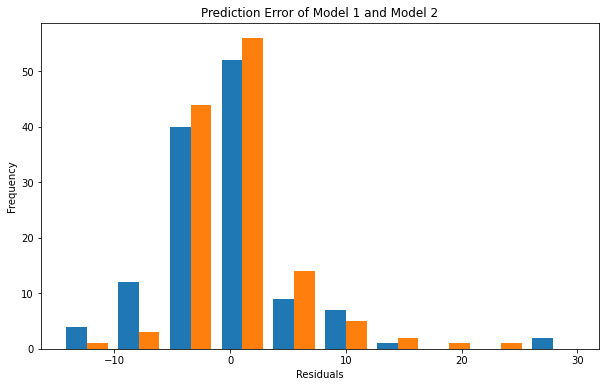

In [40]:
# plot the side by side histogram for both models' prediction error
plt.figure(figsize=(10, 6))
plt.hist([res1, res2], label=['res1', 'res2'])
plt.xlabel('Residuals')
plt.title('Prediction Error of Model 1 and Model 2')
plt.ylabel('Frequency')
plt.show()

Model 2 has lower RMSE and MAE values, 
which indicates that it is better at predicting the actual target values. 
Additionally, the residual plot for Model 2 is more evenly distributed around 0, whereas the residual plot for Model 1 shows a clear pattern of increasing residuals with increasing predicted values. This suggests that Model 2 has a more accurate and consistent fit to the data compared to Model 1.


**TODO 9**

Now consider all the features (after removing linearly dependent variables). 

The goal is to fit a LASSO linear regression model on the training set with a package at your choice. 

Compare the model performance of lambda in the range of [0,1] with the step of 0.01.

Plot RMSE versus log(lambda).

Pick the appropriate lambda value according to the plot.

Present the model summary with the selected lambda. We call this model **Model 3**.

In [41]:
alphas = np.linspace(0,1,100)
lasso = Lasso(max_iter=10000)
coefs = []
rmse=[]
for a in alphas:
 lasso.set_params(alpha=a)
 #print(a)
 model3_1=lasso.fit(X_train, y_train)
 coefs.append(lasso.coef_)
 yhat = model3_1.predict(X_val)
 rmse1 = np.sqrt(mean_squared_error(y_val,yhat))
 rmse.append(rmse1)

C:\Users\Shreya Pande\AppData\Local\Temp\ipykernel_19048\2403807861.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model3_1=lasso.fit(X_train, y_train)
C:\Users\Shreya Pande\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shreya Pande\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.294e+03, tolerance: 3.361e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

Text(0.5, 1.0, 'RMSE vs log(alpha)')

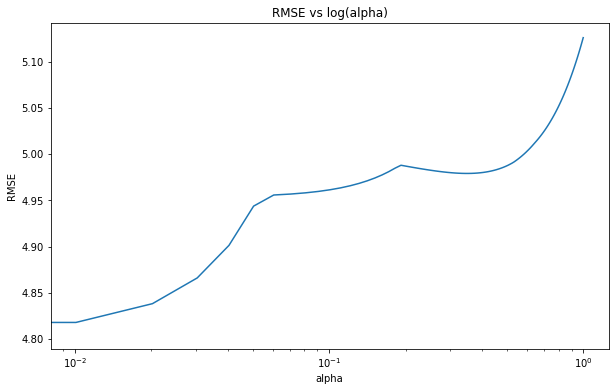

In [42]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, rmse)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs log(alpha)')

In [43]:
# here we are getting the lowest value of error at the value 0.01. Therefore, alpha = 0.01 will give the best fit model
model3 = Lasso(alpha = 0.01)
model3.fit(X_train, y_train)

Lasso(alpha=0.01)

In [44]:
# convert 2D array to the 1D array
model3_coef = model3.coef_.flatten()
# intercept
print('Intercept: ', model3.intercept_)
# r-squared value of the model
print('R-Squared value: ', model3.score(X_train, y_train))
# feature weights of the model
print(pd.DataFrame({'Predictors': X_train.columns, 'Feature Weights Values': model3_coef}))

Intercept:  [26.02600718]
R-Squared value:  0.7441073279038188
   Predictors  Feature Weights Values
0        CRIM               -0.125763
1          ZN                0.020174
2       INDUS               -0.026210
3        CHAS                2.813631
4         NOX              -14.056620
5          RM                4.450460
6         AGE               -0.011037
7         DIS               -1.327054
8         RAD                0.105395
9     PTRATIO               -0.914612
10          B                0.013606
11      LSTAT               -0.522667


R squeared value is 0.74 which is decent. Feauture weight for NOX is pretty high while others are mostly in the lower ballpark range. The R2 value of 0.74 means that about 74% of the variance in the target variable can be explained by the predictors in the model. This indicates that the model has some predictive power, but there is still a substantial amount of unexplained variance. The model comparision states that this model works better than our previous models


**TODO 10**

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance matrics.

In [45]:
# predict the values on test dataset
yvalid_pred = model3.predict(X_val)
result = pd.DataFrame({'Predicted': yvalid_pred, 'Actual': y_val['target'], 'Residuals': y_val['target'] - yvalid_pred})
result

,Predicted,Actual,Residuals
173,28.854415,23.6,-5.254415
274,35.369841,32.4,-2.969841
491,17.683996,13.6,-4.083996
72,25.109933,22.8,-2.309933
452,19.025227,16.1,-2.925227
...,...,...,...
418,3.275572,8.8,5.524428
117,24.630949,19.2,-5.430949
42,25.444018,25.3,-0.144018
322,22.904228,20.4,-2.504228


In [46]:
# count the rmse value
rmse = (np.sqrt(mean_squared_error(y_val, yvalid_pred)))
# convert the array to 1D array
yvalid_pred = yvalid_pred.flatten()
# calculate the r2 score
r2 = r2_score(y_val, yvalid_pred)
print('\nRMSE: ', rmse)
print('R2 value: ', r2)


RMSE:  4.817691034679868
R2 value:  0.6685549960423985



**TODO 11**

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

Going by the performance evaluation of our model, **Model 2** seems better as it has the hightest R2 value. I would have preffered Model 2 for future implementations. 

### Problem 2

**About the data:** <br>
The advertising dataset includes advertising expenditure and sales of a product in 200 distinct markets.
The columns are as follows:

*   TV: Advertising expenditure of product in Television sector 
*   Newpaper: Advertising expenditure of product in Newspaper sector
*   Sales: Sales of the product


The goal is to predict the sales of the product based on the advertising expenditure in the two sectors.










#### Using Sklearn

Import Advertising.csv data <br>
(Sales column is the target variable)

In [67]:
adv_url = "https://raw.githubusercontent.com/shreyapande1/HW4/main/advertising.csv"
adv = pd.read_csv(adv_url)

In [68]:
adv.head()

,TV,newspaper,sales
0,230.1,69.2,22.1
1,44.5,45.1,10.4
2,17.2,69.3,9.3
3,151.5,58.5,18.5
4,180.8,58.4,12.9


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

**Todo 1:** Fit the data in a linear regression model using sklearn


In [73]:
X = adv[["TV", "newspaper"]]
y = adv["sales"]

In [74]:
reg = LinearRegression()
reg.fit(X, y)
print("Intercept: {:.2f}".format(reg.intercept_))
print("Coefficients: {}".format(list(zip(X.columns, reg.coef_))))

Intercept: 5.77
Coefficients: [('TV', 0.04690121389190709), ('newspaper', 0.04421942424519283)]


**Todo 2:** 
Predict the sales values from the above fitted model <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [76]:
y_pred = reg.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R Squared Score: {:.2f}".format(r2))

Mean Absolute Error: 2.40
Mean Squared Error: 9.59
Root Mean Squared Error: 3.10
R Squared Score: 0.65


**Todo 3**: Plot the Actual and Predicted values. Provide interpretations for the visualization

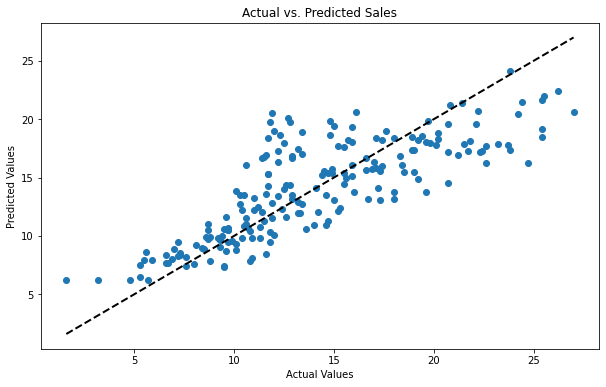

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Sales')
plt.show()

The data follows the line, yet is scattered, the model seems to be performing fairly well yet might have certain outliers, since, data is scattered at center and ends

**Todo 4:** Plot a 3D visualization for the dataset given. The plane of the 3D plot should represent the line equation and the actual values are scattered across the plot

C:\Users\Shreya Pande\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


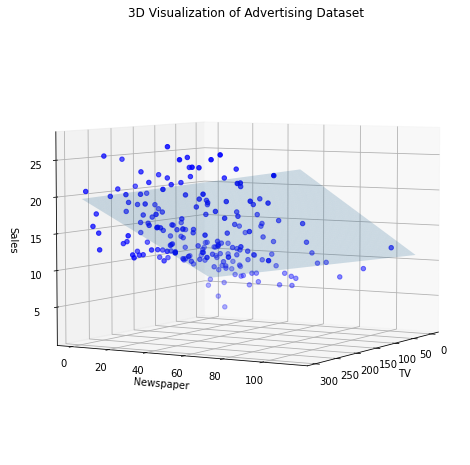

In [78]:
xx, yy = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), np.linspace(X.newspaper.min(), X.newspaper.max(), 100))
zz = reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=30, elev=5)
ax.scatter(X.TV, X.newspaper, y, c='b', marker='o')

# Plot the plane of the linear regression model
ax.plot_surface(xx, yy, zz, alpha=0.2)
ax.set_xlabel('TV')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Sales')
ax.set_title('3D Visualization of Advertising Dataset')
plt.show()

#### Using Matrix Multiplication

##### Without Bias (excluding B0)

Import Advertsing.csv <br>
(Sales column is the target variable)

In [79]:
adv_url = "https://raw.githubusercontent.com/shreyapande1/HW4/main/advertising.csv"
adv = pd.read_csv(adv_url)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Todo 1:** Use matrix multiplication to calculate the coefficients of the linear regression model


In [81]:
X = adv[['TV', 'newspaper']].values
y = adv['sales'].values

# Calculate the coefficients using matrix multiplication
w = np.linalg.inv(X.T @ X) @ X.T @ y

In [82]:
w

array([0.06644496, 0.10582324])

**Todo 2**: Predict the sales values from the above coefficients calculated. <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score with the predicted values to the actual values given in the csv.

In [83]:
y_pred = X @ w

In [84]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R Squared Score:", r2)

Mean Absolute Error: 3.176486954736882
Mean Squared Error: 15.477158327054251
Root Mean Squared Error: 3.934101972122005
R Squared Score: 0.4285865483367334


**Todo 3:** Plot the Actual and Predicted values. Provide interpretations for the visualization

Text(0.5, 1.0, 'Actual vs. Predicted Sales')

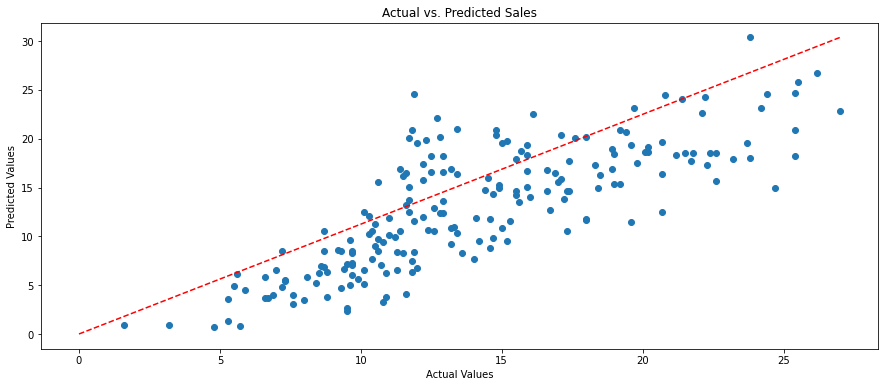

In [85]:
fig, ax = plt.subplots(figsize=(15, 6)) 
plt.plot([0, max(y)], [0, max(y_pred)], 'r--')
ax.scatter(y, y_pred)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Actual vs. Predicted Sales')

The data is scattered widely around the diagonal line, this indicates that the model is not performing very well, we can observe that the values are mainly below the diagonal line in a graph of the actual and predicted values, it means that the model is generally underestimating the target variable

##### With Bias (including B0)

**Todo 1:** Use matrix multiplication to calculate the coefficients of the linear regression model with bias


In [86]:
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

In [87]:
coeffs = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

In [88]:
coeffs.flatten()

array([5.77494797, 0.04690121, 0.04421942])

**Todo 2**: 

Predict the sales values from the above coefficients calculated. <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score with the predicted values to the actual values given in the csv.

In [89]:
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
y_pred = X_bias.dot(theta)

In [90]:
mae = np.mean(np.abs(y - y_pred))
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2_score = 1 - (ss_res / ss_tot)

print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R Squared Score: {:.2f}".format(r2_score))

Mean Absolute Error: 2.40
Mean Squared Error: 9.59
Root Mean Squared Error: 3.10
R Squared Score: 0.65


**Todo 3**: Plot the Actual and Predicted values. Provide interpretations for the visualization

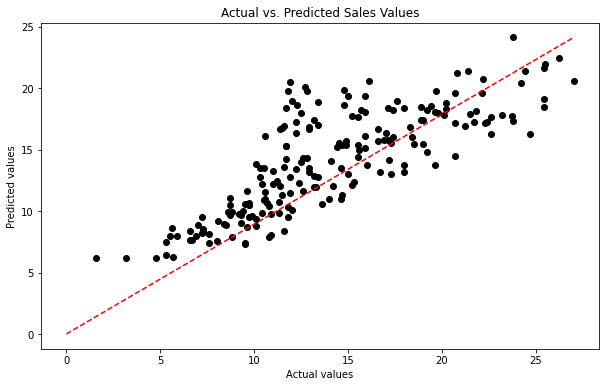

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, c='black')
plt.plot([0, max(y)], [0, max(y_pred)], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Sales Values')
plt.show()

The graph looks similar to what we had in TODO3, scattered around the center but doesnt necessarily follow the trend along the diagonal line. The predicted values are majorly above the line it might mean that the model is generally overestimating the target variable. This suggests that the model may be biased towards higher values.

**Todo 4**: Compare and interpret results of with and without bias.

The Model1 might be underfitting the data a bit as compared to model2 which might be overestimating the target variable. Model2 overall looks like a better fit as, most of the predicted values are around the diagonal line as compared to model1

**Todo 5**: Do you notice any difference between the model evaluated with bias and sklearn model.

The model evaluated with bias tends to fit the data better than the model evaluated without bias

#Problem 3 - Forward Selection

Using the abalone csv file, implement the forward selection.

For performance evaluation, use adjusted R squared.

**Dataset:**
abalone.csv

**Attribute Information:**
Given is the attribute name, attribute type, the measurement unit, and a brief description. 

Name / Data Type / Measurement Unit / Description 

Length / continuous / mm / Longest shell measurement 

Diameter / continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous / grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding) 

Shell weight / continuous / grams / after being dried 

Rings / integer / -- / +1.5 gives the age in years

**The target variable is Rings. The rest are predictors.**

**TODO 1:**
Load the csv file and split the data into train and test with 70:30 ratio.


In [93]:
ablone_url = "https://raw.githubusercontent.com/shreyapande1/HW4/main/abalone.csv"
ablone = pd.read_csv(ablone_url)

In [94]:
ablone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [95]:
# Splitting the dataset into 70:30 ratio for train and test
train_ablone, test_ablone = train_test_split(ablone, test_size=0.3, random_state = 42)

In [96]:
print("Train set %:", round(len(train_ablone)/len(ablone)*100))
print("Test set %:", round(len(test_ablone)/len(ablone)*100))

Train set %: 70
Test set %: 30


In [97]:
print("Training data dimentions") 
print(train_ablone.shape)
print("\n")
print("Testing data dimentions")
print(test_ablone.shape)

Training data dimentions
(2923, 8)


Testing data dimentions
(1254, 8)


**TODO 2:**
Choosing the first variable.

Write a function with inputs as variables, builds a linear regression model (use sklearn) and returns the adjusted R squared score. 

1. From the 6 variables present, select one variable each time and build a linear regression model (using the above function that you have built). 

2. Compare the model performance by adjusted R square. Present your results in a tabular form with vairable and the R squared value.

3. Select the winning model.

In [117]:
def calc_adj_r2(X, y, r2):
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    return adj_r2

def tlrm(X, y):
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    adj_r2 = calc_adj_r2(X, y, r2)
    return adj_r2

In [118]:
variables = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

results = pd.DataFrame(columns=['Variable', 'Adj R-Squared'])

for var in variables:
    X = ablone[[var]]
    y = ablone['Rings']
    adj_r2 = tlrm(X, y)
    results = results.append({'Variable': var, 'Adj R-Squared': adj_r2}, ignore_index=True)

results.sort_values(by=['Adj R-Squared'], ascending=False, inplace=True)
print(results)

         Variable Adj R-Squared
6    Shell weight      0.393704
1        Diameter      0.330074
2          Height      0.310605
0          Length      0.309771
3    Whole weight      0.291851
5  Viscera weight      0.253655
4  Shucked weight      0.176946


C:\Users\Shreya Pande\AppData\Local\Temp\ipykernel_19048\2784265880.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Adj R-Squared': adj_r2}, ignore_index=True)
C:\Users\Shreya Pande\AppData\Local\Temp\ipykernel_19048\2784265880.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Adj R-Squared': adj_r2}, ignore_index=True)
C:\Users\Shreya Pande\AppData\Local\Temp\ipykernel_19048\2784265880.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Adj R-Squared': adj_r2}, ignore_index=True)
C:\Users\Shreya Pande\AppData\Local\Temp\ipykernel_19048\2784265880.py:9: FutureWarning: The frame.append met

"Shell weight" appears to be the variable with the highest performance as a predictor of "Rings" with adj R-squared value of 0.393704

**TODO 3:**
Choosing the second variable
1. Using the variable from the winning model, find the second best variable with the possible combinations.

2. compare the model performance and present your results in a tabular form.

3. select the winning model.

In [119]:
X = ablone[['Shell weight', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight']]
y = ablone['Rings']

# find all possible combinations of two variables
combinations = [('Shell weight', fix_var) for fix_var in X.columns]

# calculate adjusted R-squared for each combination
results = []
for combo in combinations:
    model = LinearRegression().fit(X[list(combo)], y)
    r2 = model.score(X[list(combo)], y)
    n = len(y)
    p = len(combo)
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    results.append({'Variable 1': combo[0], 'Variable 2': combo[1], 'Adjusted R-squared': adj_r2})

# display results in a table and comapre
results_df = pd.DataFrame(results).drop(0)
results_df

,Variable 1,Variable 2,Adjusted R-squared
1,Shell weight,Diameter,0.393793
2,Shell weight,Height,0.399534
3,Shell weight,Whole weight,0.433679
4,Shell weight,Shucked weight,0.473671
5,Shell weight,Viscera weight,0.418150


Shell weight	Shucked weight	0.473671 looks like the winning model here with highest adjusted R-squared value

**Todo 4:** What are the 2 variables selected

"Shell Weight" was the winning variable selected. After "Shell Weight", individually looking, we see that the adj R2 value for "Shucked weight" is the highest, however if we look at the combinations, we see that the winning combination with highest adj R2 value is "Shell weight, Diameter, Height, Whole weight, Shucked weight, Viscera weight"

By looking at the above combinations and their adj R2 square values, we can conclude that, "Shell weight, Shucked weight" are the variable choice with adj R2 as -> 0.473671